<a href="https://colab.research.google.com/github/alanRiveros/machineLearning/blob/master/LogisticRegretionPytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión logística

In [0]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

In [5]:
n = 100
h = n//2
dimen = 2

data = np.random.randn(n, dimen)*3
data

array([[ 2.5574804 ,  0.93104674],
       [-3.83217581,  1.27551698],
       [ 1.38887093, -1.86269829],
       [-2.85717128, -1.72042365],
       [-5.00964236,  1.23470877],
       [-3.12680751, -4.75772689],
       [ 1.78400255,  6.44394674],
       [ 2.30067542,  2.0836656 ],
       [ 1.28057805,  1.02853978],
       [ 0.93620633, -0.19622267],
       [ 4.63572747,  0.07284247],
       [-1.51811525,  3.28888203],
       [ 0.12661637, -8.22110443],
       [-2.44448671,  5.2198459 ],
       [-0.62215371,  2.27484395],
       [ 1.10004642, -0.87408255],
       [ 1.96975021,  2.23810413],
       [ 0.75195345,  3.09632008],
       [-2.55369486, -2.17776439],
       [-3.87355476,  7.56508492],
       [ 2.90934797,  0.27224436],
       [-2.45713363, -2.57474111],
       [-2.5488197 , -1.30714901],
       [-2.7346083 ,  4.79636727],
       [-0.86826477,  0.20254049],
       [-3.74993085, -7.4092194 ],
       [-1.75706252, -0.5057786 ],
       [-0.59816527,  3.70763028],
       [ 0.17372037,

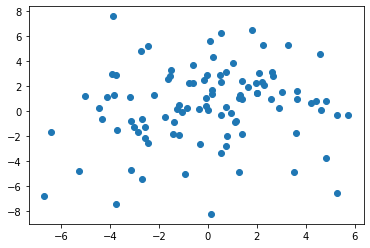

In [6]:
plt.scatter(data[:,0], data[:,1])

In [0]:
data[:h, :] = data[:h, :] - 3*np.ones((h, dimen))

In [0]:
data[:h, :] = data[h:, :] + 3*np.ones((h, dimen))

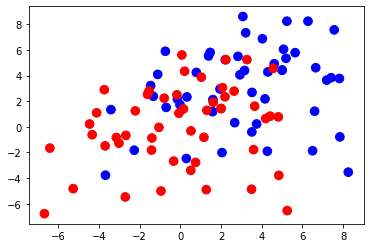

In [15]:
colors = ['blue', 'red']

color = np.array([colors[0]]*h + [colors[1]]*h).reshape(n)
plt.scatter(data[:,0], data[:,1], c=color, s=75)

In [17]:
target = np.array([0]*h + [1]*h).reshape(n, 1)
x = torch.from_numpy(data).float().requires_grad_(True)
y = torch.from_numpy(target).float()

x.shape, y.shape

(torch.Size([100, 2]), torch.Size([100, 1]))

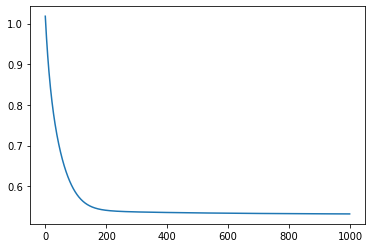

In [22]:

model = nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid()
)
loss_function = nn.BCELoss()

optimizer = optim.SGD(model.parameters(), lr= 0.01)

losses = []
iterations = 1000

for i in range(iterations):
  result = model(x)
  loss = loss_function(result, y)
  losses.append(loss.data)
  optimizer.zero_grad()
  loss.backward()

  optimizer.step()

plt.plot(range(iterations), losses)